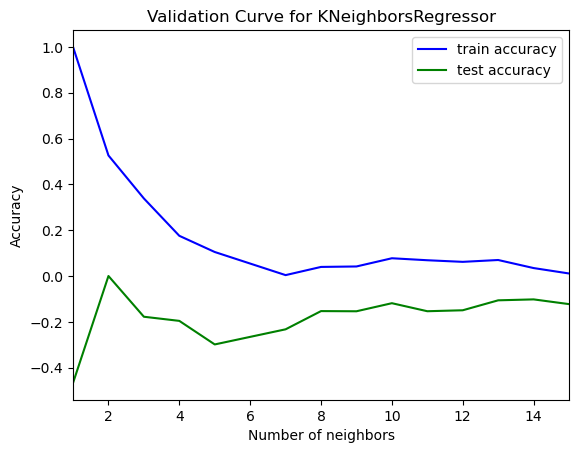

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Load the data
df = pd.read_csv('file:///C:/Users/test/Downloads/metro1railCustomer.csv')

# Feature engineering
df['Distance'] = df.apply(lambda row: abs(ord(row['Destination'][0]) - ord('F')), axis=1)
df['NameLength'] = df['Name'].apply(len)

# Encode categorical features
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Complain'] = df['Complain'].map({'No': 0, 'Yes': 1})

# Split the data into features and target
X = df[['Age', 'Gender', 'Distance', 'NameLength']]
y = df['Complain']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the range of neighbors
n_neighbors = [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# Compute validation curve
train_scores, test_scores = validation_curve(
    KNeighborsRegressor(),
    X_scaled,
    y,
    param_name="n_neighbors",
    param_range=n_neighbors,
    cv=5  # You can change the number of cross-validation folds as needed
)

# Plot the results
plt.plot(n_neighbors, train_scores.mean(axis=1), 'b', label="train accuracy")
plt.plot(n_neighbors, test_scores.mean(axis=1), 'g', label="test accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors')
plt.xlim([1, 15])  # Adjusted x-axis limits for better visibility
plt.legend(loc="best")
plt.title("Validation Curve for KNeighborsRegressor")
plt.show()

In [22]:
# Define the data and the cv variable
# X and y should be defined beforehand
cv = KFold(n_splits=5)

# each parameter setting do cross-validation:
for C in [0.001, 0.01, 0.1, 1, 10]:
    for gamma in [0.001, 0.01, 0.1, 1]:
        scores = cross_val_score(SVR(C=C, gamma=gamma), X, y, cv=cv)
        print("C: %f, gamma: %f, average score: %f" % (C, gamma, np.mean(scores)))


C: 0.001000, gamma: 0.001000, average score: -0.280120
C: 0.001000, gamma: 0.010000, average score: -0.279970
C: 0.001000, gamma: 0.100000, average score: -0.279179
C: 0.001000, gamma: 1.000000, average score: -0.279201
C: 0.010000, gamma: 0.001000, average score: -0.280316
C: 0.010000, gamma: 0.010000, average score: -0.278455
C: 0.010000, gamma: 0.100000, average score: -0.275939
C: 0.010000, gamma: 1.000000, average score: -0.276001
C: 0.100000, gamma: 0.001000, average score: -0.283648
C: 0.100000, gamma: 0.010000, average score: -0.266002
C: 0.100000, gamma: 0.100000, average score: -0.240951
C: 0.100000, gamma: 1.000000, average score: -0.241840
C: 1.000000, gamma: 0.001000, average score: -0.324349
C: 1.000000, gamma: 0.010000, average score: -0.257704
C: 1.000000, gamma: 0.100000, average score: -0.083207
C: 1.000000, gamma: 1.000000, average score: -0.102650
C: 10.000000, gamma: 0.001000, average score: -0.429232
C: 10.000000, gamma: 0.010000, average score: -0.685821
C: 10.00

In [23]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=cv)

In [24]:
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]})

In [25]:
grid.predict(X)

array([0.09944265, 0.09943441, 0.09944265, 0.10037676, 0.10019335,
       0.1004283 , 0.09993209, 0.10022392, 0.09996282, 0.09988998,
       0.9003348 , 0.09991447, 0.10011918, 0.90011944, 0.89969225,
       0.09993119, 0.09988998, 0.89996615, 0.10035927, 0.90034633])

In [29]:
print(grid.best_score_)
print(grid.best_params_)

-0.08041432515277518
{'C': 10, 'gamma': 0.1}


In [30]:
print(grid.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_gamma', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [31]:
cv_results = pd.DataFrame(grid.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001196,0.000399,0.001199,0.000403,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.0,0.0,-0.119405,-0.640189,-0.641007,-0.280120,0.297541,15
1,0.001197,0.000394,0.001000,0.000014,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.0,0.0,-0.119300,-0.639385,-0.641167,-0.279970,0.297397,14
2,0.001005,0.000013,0.000991,0.000011,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.0,0.0,-0.119121,-0.638346,-0.638428,-0.279179,0.296500,12
3,0.001007,0.000013,0.000789,0.000395,0.001,1,"{'C': 0.001, 'gamma': 1}",0.0,0.0,-0.119201,-0.638401,-0.638401,-0.279201,0.296498,13
4,0.000996,0.000002,0.000998,0.000002,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.0,0.0,-0.119330,-0.639305,-0.642944,-0.280316,0.297806,16


In [11]:
cv_results_tiny = cv_results[['param_C', 'param_gamma', 'mean_test_score']]
cv_results_tiny.sort_values(by='mean_test_score', ascending=False).head()

,param_C,param_gamma,mean_test_score
18,10,0.1,-0.080414
14,1,0.1,-0.083207
19,10,1,-0.102650
15,1,1,-0.102650
10,0.1,0.1,-0.240951


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}
cv = KFold(n_splits=10, shuffle=True)

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=cv)

grid.fit(X_train, y_train)
grid.score(X_test, y_test)

-0.06283518662354792

In [13]:
grid.best_params_

{'C': 0.001, 'gamma': 0.001}

In [14]:
from sklearn.model_selection import train_test_split, ShuffleSplit

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}
single_split_cv = ShuffleSplit(n_splits=1)

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=single_split_cv, verbose=3)

grid.fit(X_train, y_train)
grid.score(X_test, y_test)

Fitting 1 folds for each of 20 candidates, totalling 20 fits
[CV 1/1] END ..............C=0.001, gamma=0.001;, score=0.000 total time=   0.0s
[CV 1/1] END ...............C=0.001, gamma=0.01;, score=0.000 total time=   0.0s
[CV 1/1] END ................C=0.001, gamma=0.1;, score=0.000 total time=   0.0s
[CV 1/1] END ..................C=0.001, gamma=1;, score=0.000 total time=   0.0s
[CV 1/1] END ...............C=0.01, gamma=0.001;, score=0.000 total time=   0.0s
[CV 1/1] END ................C=0.01, gamma=0.01;, score=0.000 total time=   0.0s
[CV 1/1] END .................C=0.01, gamma=0.1;, score=0.000 total time=   0.0s
[CV 1/1] END ...................C=0.01, gamma=1;, score=0.000 total time=   0.0s
[CV 1/1] END ................C=0.1, gamma=0.001;, score=0.000 total time=   0.0s
[CV 1/1] END .................C=0.1, gamma=0.01;, score=0.000 total time=   0.0s
[CV 1/1] END ..................C=0.1, gamma=0.1;, score=0.000 total time=   0.0s
[CV 1/1] END ....................C=0.1, gamma=1;

-0.06283518662354792

In [15]:
clf = GridSearchCV(SVR(), param_grid=param_grid)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

-0.07891997117292981